In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [4]:
cd= pd.read_csv("D://assignments//Assignment 15//Company_Data.csv")
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

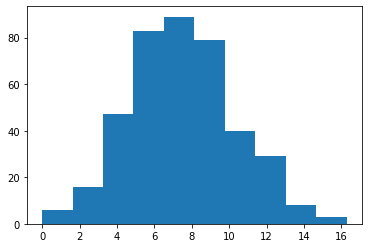

In [5]:
plt.hist(cd['Sales']) 

In [6]:
label_encoder = preprocessing.LabelEncoder()
cd['ShelveLoc']= label_encoder.fit_transform(cd['ShelveLoc']) 
cd['Urban']= label_encoder.fit_transform(cd['Urban'])
cd['US']= label_encoder.fit_transform(cd['US'])

In [7]:
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [8]:
bd=cd

In [9]:
def func(x):
    if  x < 8:
        return 'no'
    else :
        return 'yes'

In [10]:
bd['Sales_new'] = bd['Sales'].apply(func)


In [11]:
bd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_new
0,9.50,138,73,11,276,120,0,42,17,1,1,yes
1,11.22,111,48,16,260,83,1,65,10,1,1,yes
2,10.06,113,35,10,269,80,2,59,12,1,1,yes
3,7.40,117,100,4,466,97,2,55,14,1,1,no
4,4.15,141,64,3,340,128,0,38,13,1,0,no


In [12]:
bd['Sales_new']= label_encoder.fit_transform(cd['Sales_new'])

In [13]:
x=bd.iloc[:,1:10]
y=bd['Sales_new']

In [14]:
bd.Sales_new.value_counts()

0    236
1    164
Name: Sales_new, dtype: int64

In [15]:
Xtr=bd.iloc[:,1:10]
Ytr=bd['Sales_new']

In [16]:
x_train, x_test,y_train,y_test = train_test_split(Xtr,Ytr, test_size=0.3,random_state=40)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [18]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[70  9]
 [ 9 32]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        79
           1       0.78      0.78      0.78        41

    accuracy                           0.85       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.85      0.85      0.85       120

0.85


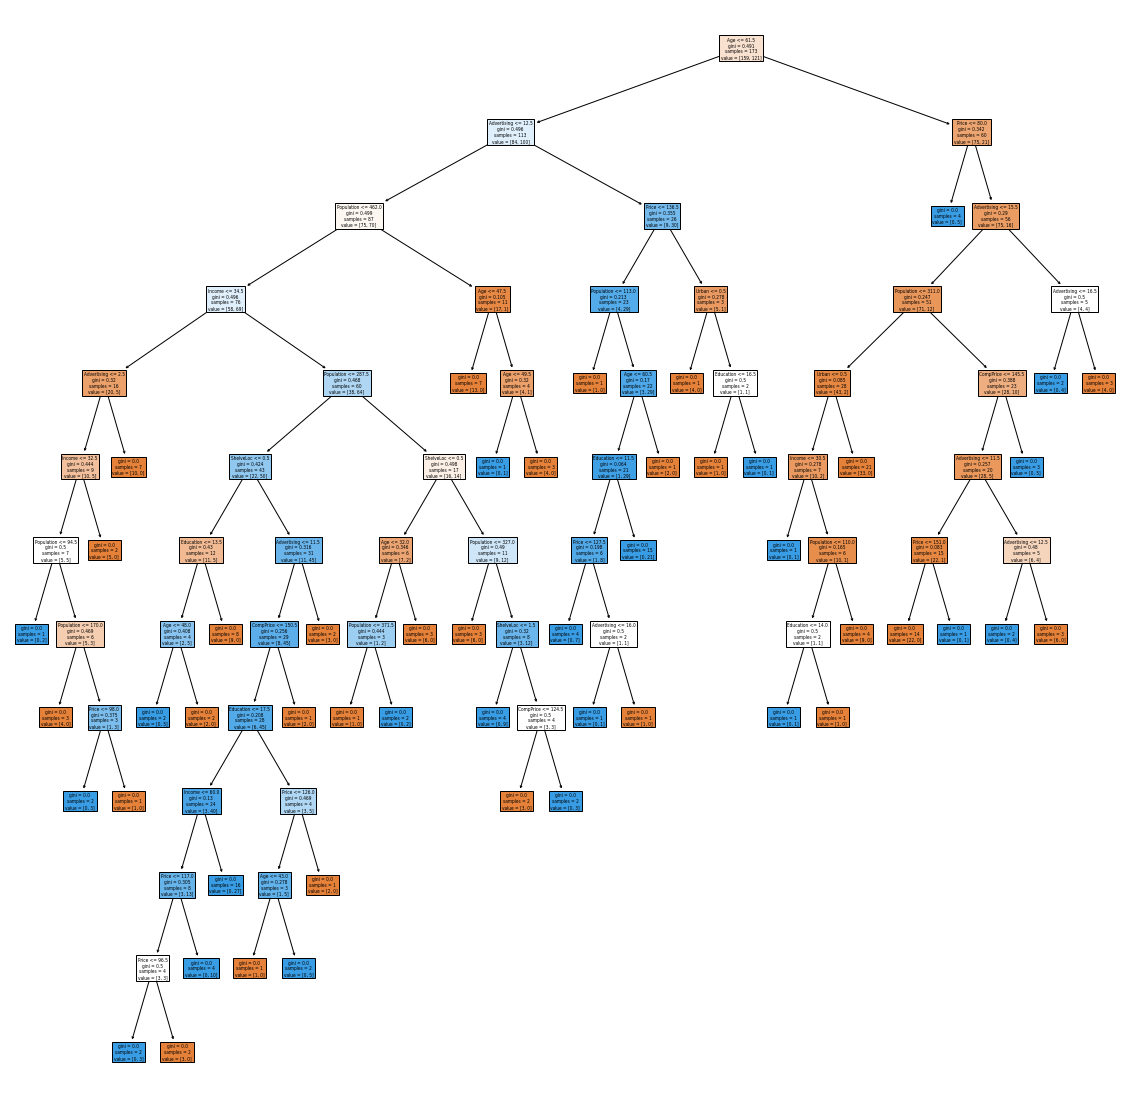

In [36]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(classifier.estimators_[0], feature_names=Xtr.columns, filled=True)